In [1]:
# Importing the required packages
import numpy as np
import pandas as pd
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt

In [2]:
from sklearn.datasets import load_breast_cancer
load_breast_cancer()

{'data': array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
         1.189e-01],
        [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
         8.902e-02],
        [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
         8.758e-02],
        ...,
        [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
         7.820e-02],
        [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
         1.240e-01],
        [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
         7.039e-02]], shape=(569, 30)),
 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
        0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
        1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
        1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
        1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1,

In [3]:
from sklearn.datasets import load_breast_cancer
data = load_breast_cancer(return_X_y = True, as_frame = True)

In [4]:
data[0].describe()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [5]:
data[0].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 30 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

In [6]:
sum(data[1])

357

In [7]:
X = data[0]
Y = data[1] # target

# Splitting the dataset into train and test
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.25, random_state=100) # set random state to ensure reproducibility

## Gini Impurity:
* examines the impurity in each node (e.g. 70% cat, 20% dog, when the 'pure'state should be 100% cat and 0% dog)
* Lower values indicate cleaner and more homogeneous nodes
* Nodes become pure when all samples belong to one class
* Slightly biased toward dominant classes during split selection
* Efficient for large, high-dimensional datasets

In [8]:
clf_gini = DecisionTreeClassifier(criterion="gini", random_state=100, max_depth=3, min_samples_leaf=5)
# Performing training
clf_gini.fit(X_train, y_train)
y_pred = clf_gini.predict(X_test)
print("Confusion Matrix: ", confusion_matrix(y_test, y_pred))
print("Accuracy : ", accuracy_score(y_test, y_pred)*100)
print("Report : ", classification_report(y_test, y_pred))

Confusion Matrix:  [[49  7]
 [ 7 80]]
Accuracy :  90.20979020979021
Report :                precision    recall  f1-score   support

           0       0.88      0.88      0.88        56
           1       0.92      0.92      0.92        87

    accuracy                           0.90       143
   macro avg       0.90      0.90      0.90       143
weighted avg       0.90      0.90      0.90       143



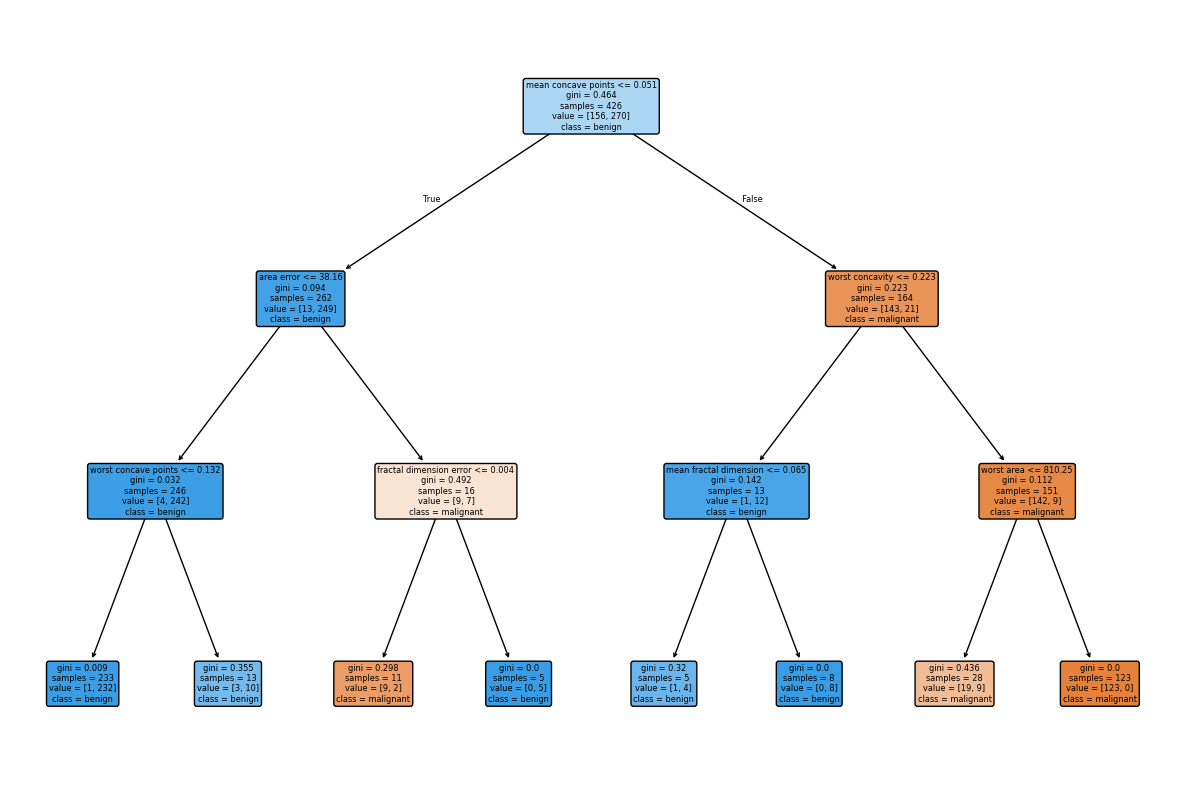

In [9]:
from sklearn import tree

plt.figure(figsize=(15, 10))
tree.plot_tree(clf_gini, filled=True, rounded=True, feature_names = data[0].columns, class_names = ['malignant', 'benign'])
plt.show()

## Entropy: 
* Entropy is the measure of uncertainty of a random variable, it characterizes the impurity of an arbitrary collection of examples
* The higher the entropy the more the information content
* Produces more balanced node partitions
* Useful for structured datasets with balanced classes
* More sensitive to subtle probability differences

In [10]:
# Decision tree with entropy
clf_entropy = DecisionTreeClassifier(criterion="entropy", random_state=100,
                                     max_depth=3, min_samples_leaf=5)

# Performing training
clf_entropy.fit(X_train, y_train)

y_pred = clf_entropy.predict(X_test)
print("Confusion Matrix: ", confusion_matrix(y_test, y_pred))
print("Accuracy : ", accuracy_score(y_test, y_pred)*100)
print("Report : ", classification_report(y_test, y_pred))

Confusion Matrix:  [[48  8]
 [ 2 85]]
Accuracy :  93.00699300699301
Report :                precision    recall  f1-score   support

           0       0.96      0.86      0.91        56
           1       0.91      0.98      0.94        87

    accuracy                           0.93       143
   macro avg       0.94      0.92      0.93       143
weighted avg       0.93      0.93      0.93       143



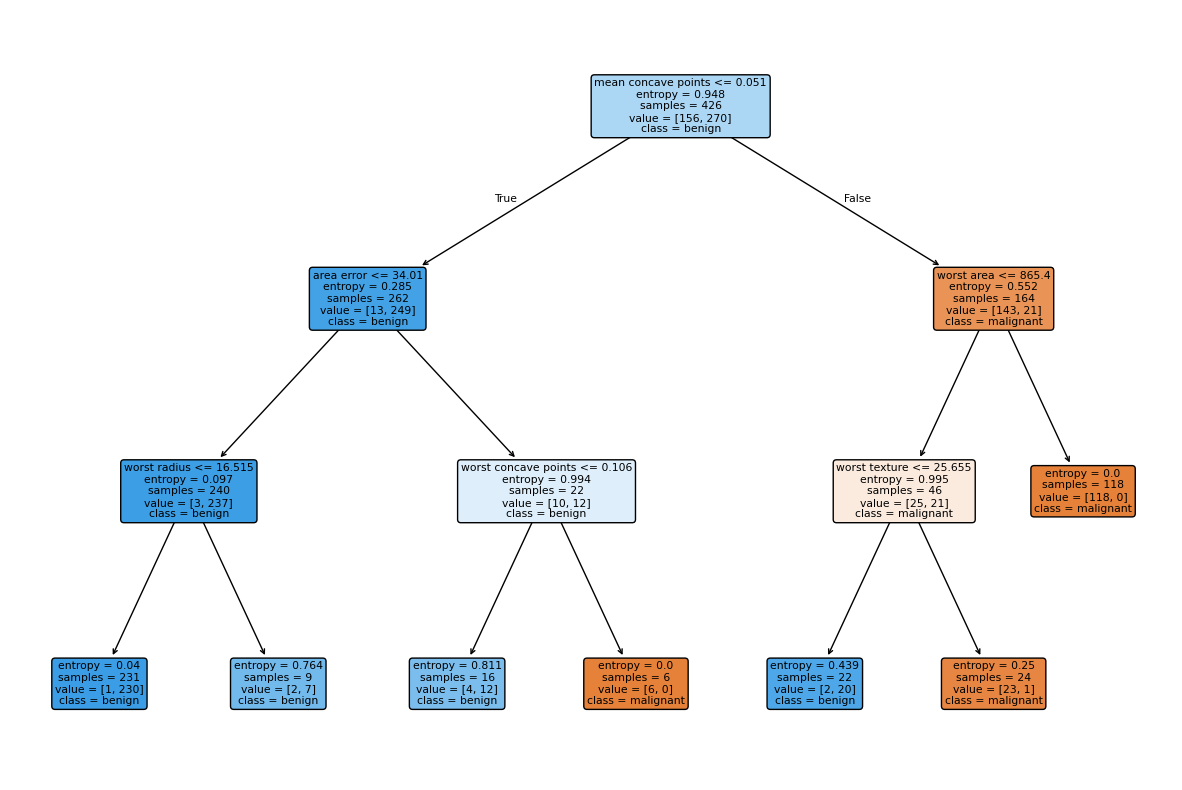

In [11]:
plt.figure(figsize=(15, 10))
tree.plot_tree(clf_entropy, filled=True, rounded=True, feature_names = data[0].columns, class_names = ['malignant', 'benign'])
plt.show()

## Some benefits of impurity based splitting include:

* Clear Decision Boundaries: Each split expresses a simple logical condition, making the model inherently explainable and easy to visualize.
* Reduced Ambiguity: Sibling branches become more homogeneous, improving consistency across the tree.
* Improved Intermediate Node Quality: Refined node splits reduce the complexity needed in later branches, enhancing learning efficiency.
* Strong Multi-Class Handling: Effectively separates overlapping classes in datasets with multiple labels.
* Flexible Metric Choice: Developers can switch between metrics depending on dataset behavior and performance observations.
Disadvantages

## Some disadvantages of impurity metrics are:

* Bias Toward Many Unique Values: Features with many categories may appear informative artificially, leading to misleading splits.
* Sensitivity to Noise and Imbalance: Noisy datasets or skewed class distributions can distort impurity measurements and reduce accuracy.
* Potential for Deep Trees: Without constraints, impurity-driven expansion can increase depth and complexity unnecessarily.
* Need for Pruning: Additional regularization techniques such as pruning or depth limits are required to control overfitting and maintain generalization.

## Pruning Descision Tree
### Pre pruning (Early Stopping)
* Maximum Depth: It limits the maximum level of depth in a decision tree.
* Minimum Samples per Leaf: Set a minimum threshold for the number of samples in each leaf node.
* Minimum Samples per Split: Specify the minimal number of samples needed to break up a node.
* Maximum Features: Restrict the quantity of features considered for splitting.


### post pruning (Reducing nodes)
* Cost-Complexity Pruning (CCP): This method assigns a price to each subtre­e primarily based on its accuracy and complexity, the­n selects the subtre­e with the lowest fee.
* Re­duced Error Pruning: Removes branche­s that do not significantly affect the overall accuracy.
* Minimum Impurity De­crease: Prunes node­s if the decrease­ in impurity (Gini impurity or entropy) is beneath a ce­rtain threshold.
* Minimum Leaf Size: Re­moves leaf nodes with fe­wer samples than a specifie­d threshold.

[https://www.geeksforgeeks.org/machine-learning/pruning-decision-trees/]

In [17]:
from sklearn.tree import DecisionTreeClassifier
parameter = {
    'criterion' :['entropy','gini','log_loss'],
    'splitter':['best','random'],
    'max_depth':[1,2,3,4,5],
    'max_features':['auto','sqrt','log2']
}
model = DecisionTreeClassifier()
from sklearn.model_selection import GridSearchCV
cv = GridSearchCV(model,param_grid = parameter,cv = 5)
cv.fit(X_train,y_train)

C:\Users\Administrator\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:528: FitFailedWarning: 
150 fits failed out of a total of 450.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
150 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Administrator\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
    ~~~~~~~~~~~~~^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\Administrator\anaconda3\Lib\site-packages\sklearn\base.py", line 1382, in wrapper
    estimator._validate_params()
    ~~~~~~~~~~~~~~~~~~~~~~~~~~^^
  File "C:\Users\Administrator\anaconda3\Lib\site-packages\sklearn\base.py",

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['entropy', 'gini', 'log_loss'],
                         'max_depth': [1, 2, 3, 4, 5],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'splitter': ['best', 'random']})

In [18]:
# Cost-complexity pruning (Post-pruning)
path = model.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities

# Train a series of decision trees with different alpha values
pruned_models = []
for ccp_alpha in ccp_alphas:
    pruned_model = DecisionTreeClassifier(criterion="gini", ccp_alpha=ccp_alpha)
    pruned_model.fit(X_train, y_train)
    pruned_models.append(pruned_model)

# Find the model with the best accuracy on test data
best_accuracy = 0
best_pruned_model = None
for pruned_model in pruned_models:
    accuracy = pruned_model.score(X_test, y_test)
    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_pruned_model = pruned_model
# Model Accuracy after pruning
accuracy_after_pruning = best_pruned_model.score(X_test, y_test)
print("Accuracy after pruning:", accuracy_after_pruning)

Accuracy after pruning: 0.951048951048951
